In [46]:
__version__ = '0.3'
__author__  = "Robert Matern (r.matern@stud.uni-hannover.de)"
__date__    = ''
__url__     = ''
__copyright__ = "(C) 2015 Robert Matern"

# Ausführungsdatei

In [47]:
# Funktionen werden hinzugeladen.
%run Parameter.ipynb
%run DynamicProgramm.ipynb

Python Version 2.7.9 |Anaconda 2.2.0 (x86_64)| (default, Dec 15 2014, 10:37:34) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Numpy Version 1.9.2
Matplotlib Version 1.4.3
Pandas Version 0.15.2


In [48]:
# Beispiel wird hinzugeladen.
%run Data01.ipynb

0:00:00.000357


In [49]:
# Grafiken werden im IPython Notebook angezeigt.
%matplotlib inline

Als ersten Schritt werden für alle möglichen Systemzustände des Beispiels die jeweiligen Erwartungswerte berechnet. Dies erfolgt über eine Implementierung der Dynamischen Programmierung der mathematischen Modellformulierung des Problems der Auftragsannahme im Revenue Management (siehe Bellman-Gleichung).

In [50]:
%time print DP(solutions, conditions, products, resources, capacities, consumtions, times, probs)

231.25
CPU times: user 5.75 ms, sys: 102 µs, total: 5.85 ms
Wall time: 8.9 ms


In [51]:
# Erstellung der Struktur als NetworkX-Graph
%time graph = Structure(solutions, conditions, products, consumtions, revenues)

# Ermittlung der besten Politik (Dijkstra Algorithmus)
%time db, df = Best_Politic(graph, times, resources)
%time db_demand, df_demand = Best_Politic_Demand(graph, times, resources, demands)

CPU times: user 6.03 ms, sys: 180 µs, total: 6.21 ms
Wall time: 12.5 ms
Optimalen Politik zum Zeitpunkt "t" und unter Beachtung der Restkapazitäten "c[h]": 

         Value     Successor  Res_Cap1  Res_Cap2  Time  Best Order  \
4   231.250000    [8, 3, 13]         2         1     4           2   
8   137.500000       [17, 7]         2         0     3           1   
13  141.703125  [17, 12, 22]         1         1     3           2   
17   75.000000      [16, 26]         1         0     2           1   
22   38.000000      [26, 21]         0         1     2           2   
26    0.000000          [25]         0         0     1           0   
3   191.687500    [2, 12, 7]         2         1     3           2   
12  113.000000  [16, 11, 21]         1         1     2           2   
21   20.000000      [25, 20]         0         1     1           2   
7   100.000000       [16, 6]         2         0     2           1   
16   50.000000      [25, 15]         1         0     1           1   
25

In [52]:
%time print Best_Path(graph, times)

Kürzester Pfad: [4, 13, 22, 26, 25] 

None
CPU times: user 841 µs, sys: 141 µs, total: 982 µs
Wall time: 1.27 ms


CPU times: user 649 ms, sys: 33.8 ms, total: 682 ms
Wall time: 2.08 s


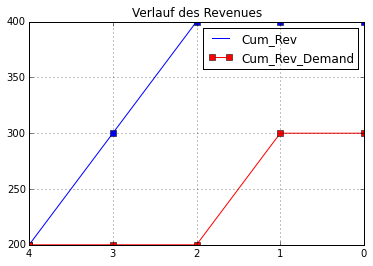

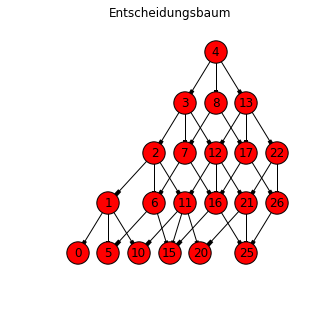

In [53]:
%time Drawing(graph, db, df, db_demand, df_demand)